In [1]:
%load_ext sql
%sql sqlite://

# Работа с несколькими таблицами

In [9]:
%%sql

DROP TABLE IF EXISTS Employees;
DROP TABLE IF EXISTS Students;
DROP TABLE IF EXISTS Faculties;

PRAGMA foreign_keys = ON; --по умолчанию выкл

CREATE TABLE Faculties(
    id integer PRIMARY KEY,
    name varchar(50) NOT NULL,
    UNIQUE (name) -- уникальные значения
);

CREATE TABLE Students(
    id integer PRIMARY KEY,
    name varchar(50) NOT NULL,
    gpa decimal(2,2),
    faculty_id integer,
    FOREIGN KEY (faculty_id) REFERENCES Faculties(id)
);

CREATE TABLE Employees(
    id int PRIMARY KEY,
    name varchar(20) NOT NULL,
    phone varchar(20),
    title varchar(20) NOT NULL,
    manager_id integer,
    FOREIGN KEY (manager_id) REFERENCES Employees(id)
);

 * sqlite://
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [ ]:
%%sql
INSERT INTO Faculties values (1, 'IT');
INSERT INTO Faculties values (2, 'KIB');

INSERT INTO Students values (1, 'Sidorov', 3.0, 1);
INSERT INTO Students values (2, 'Petrov', 3.5, 2);
INSERT INTO Students values (3, 'Verikov', 4.0, 1);
INSERT INTO Students values (4, 'Smith', 4.2, 2);
INSERT INTO Students values (5, 'Lee', 4.5, 1);
INSERT INTO Students values (6, 'Vorontsov', 3.2, NULL);

--insert into Employees values  (2, 'James', '+112', 'Vice President', 1);
INSERT INTO Employees values  (1, 'Vasyugin', '+111', 'Director', NULL);
INSERT INTO Employees values  (2, 'Jones', '+112', 'Vice President', 1);
INSERT INTO Employees values  (3, 'Smith', '+113', 'Vice President', 1);
INSERT INTO Employees values (4, 'Velaskes', '+114', 'Developer', 2);
INSERT INTO Employees values (5, 'Simon', '+115', 'Analyst', 2);
INSERT INTO Employees values (6, 'Johnson', '+116', 'Engineer', 3);
INSERT INTO Employees values (7, 'Lee', '+117', 'Engineer', 3);

# Работа с множествами


## Операция объединения

Вывести имена студентов со средним баллом, большим 3, или с именем, начинающимся с S.

In [11]:
%%sql
SELECT * FROM Students;

 * sqlite://
Done.


id,name,gpa,faculty_id
1,Sidorov,3,1
2,Petrov,3.5,2
3,Verikov,4,1
4,Smith,4.2,2
5,Lee,4.5,1
6,Vorontsov,3.2,None


In [12]:
%%sql
SELECT name
    FROM Students
WHERE name like 'S%'

UNION

SELECT name
    FROM Students
WHERE gpa > 3;

 * sqlite://
Done.


name
Lee
Petrov
Sidorov
Smith
Verikov
Vorontsov


In [13]:
%%sql
SELECT name
    FROM Students
WHERE name like 'S%'

UNION ALL

SELECT name
    FROM Students
WHERE gpa > 3;

 * sqlite://
Done.


name
Sidorov
Smith
Petrov
Verikov
Smith
Lee
Vorontsov


Вывести имена студентов и имена сотрудников, и указать 1, если студент, 0, если сотрудник

In [15]:
%%sql
SELECT name, 1 as person_type
    FROM Students

UNION ALL

SELECT name as name_new, 0
    FROM Employees;

 * sqlite://
Done.


name,person_type
Sidorov,1
Petrov,1
Verikov,1
Smith,1
Lee,1
Vorontsov,1
Vasyugin,0
Jones,0
Smith,0
Velaskes,0


## Операция пересечения

Вывести такие имена, которые есть одновременно у сотрудников и студентов

In [17]:
%%sql
SELECT name
    FROM Students

INTERSECT

SELECT name
    FROM Employees;

 * sqlite://
Done.


name
Lee
Smith


## Операция разности

Вывести имена, которые встречаются среди студентов, но которых нет у сотрудников

In [18]:
%%sql
SELECT name
    FROM Students

EXCEPT

SELECT name
    FROM Employees;

 * sqlite://
Done.


name
Petrov
Sidorov
Verikov
Vorontsov


## Работа с NULL

Вывести студентов, у которых не задан факультет

Неправильно:

In [ ]:
%%sql
SELECT * FROM Students;

 * sqlite://
Done.


id,name,gpa,faculty_id
1,Sidorov,3,1
2,Petrov,3.5,2
3,Verikov,4,1
4,Smith,4.2,2
5,Lee,4.5,1
6,Vorontsov,3.2,None


In [ ]:
%%sql
SELECT *
    FROM Students
WHERE faculty_id = NULL;

 * sqlite://
Done.


id,name,gpa,faculty_id


In [ ]:
%%sql
SELECT *
    FROM Students
WHERE faculty_id != NULL;

 * sqlite://
Done.


id,name,gpa,faculty_id


Правильно:

In [19]:
%%sql
SELECT *
    FROM Students
WHERE faculty_id IS NULL;

 * sqlite://
Done.


id,name,gpa,faculty_id
6,Vorontsov,3.2,None


Вывести сотрудников, у которых нет вышестоящего менеджера

In [21]:
%%sql
SELECT *
    FROM Employees
WHERE manager_id IS NULL;

 * sqlite://
Done.


id,name,phone,title,manager_id
1,Vasyugin,+111,Director,None


Вывести сотрудников, у которых есть вышестоящий менеджер

In [23]:
%%sql
SELECT *
    FROM Employees
WHERE manager_id IS NOT NULL;

 * sqlite://
Done.


id,name,phone,title,manager_id
2,Jones,+112,Vice President,1
3,Smith,+113,Vice President,1
4,Velaskes,+114,Developer,2
5,Simon,+115,Analyst,2
6,Johnson,+116,Engineer,3
7,Lee,+117,Engineer,3


## Вложенные подзапросы

### Поиск по множеству

Вывести студентов с факультета ИТ

In [27]:
%%sql
SELECT *
    FROM Students
WHERE faculty_id = 1; -- откуда мы знаем id?

 * sqlite://
Done.


id,name,gpa,faculty_id
1,Sidorov,3,1
3,Verikov,4,1
5,Lee,4.5,1


In [28]:
%%sql
SELECT *
    FROM Students
WHERE faculty_id IN (SELECT id FROM Faculties WHERE name = 'IT');

 * sqlite://
Done.


id,name,gpa,faculty_id
1,Sidorov,3,1
3,Verikov,4,1
5,Lee,4.5,1


Вывести студентов, которые не учатся на факультете ИТ

In [ ]:
%%sql
SELECT * FROM Students;

 * sqlite://
Done.


id,name,gpa,faculty_id
1,Sidorov,3,1
2,Petrov,3.5,2
3,Verikov,4,1
4,Smith,4.2,2
5,Lee,4.5,1
6,Vorontsov,3.2,None


In [ ]:
%%sql
SELECT *
    FROM Students
WHERE faculty_id NOT IN (SELECT id FROM Faculties WHERE name = 'IT');

 * sqlite://
Done.


id,name,gpa,faculty_id
2,Petrov,3.5,2
4,Smith,4.2,2


Заметьте, что есть еще один студент не с факультета ИТ

In [29]:
%%sql
SELECT *
    FROM Students
WHERE faculty_id NOT IN (SELECT id FROM Faculties WHERE name = 'IT')
    OR faculty_id IS NULL;

 * sqlite://
Done.


id,name,gpa,faculty_id
2,Petrov,3.5,2
4,Smith,4.2,2
6,Vorontsov,3.2,None


In [30]:
%%sql
SELECT *
    FROM Students
WHERE coalesce(faculty_id, -1) NOT IN (SELECT id FROM Faculties WHERE name = 'IT');

 * sqlite://
Done.


id,name,gpa,faculty_id
2,Petrov,3.5,2
4,Smith,4.2,2
6,Vorontsov,3.2,None


In [33]:
%%sql
SELECT coalesce(NULL, NULL, 0, 5, NULL, 1);

 * sqlite://
Done.


"coalesce(NULL, NULL, 0, 5, NULL, 1)"
0


Вывести студентов со средним баллом, большим чем средний балл у худшего студента с факультета Кибернетики

In [34]:
%%sql
SELECT *
    FROM Students
WHERE gpa > (
    SELECT MIN(gpa)
        FROM Students
    WHERE faculty_id = (select id FROM Faculties WHERE name = 'KIB')
    );

 * sqlite://
Done.


id,name,gpa,faculty_id
3,Verikov,4,1
4,Smith,4.2,2
5,Lee,4.5,1


Вывести студентов со средним баллом, большего чем средний балл у лучшего из худших студентов по факультету

Как не стоит писать:

In [35]:
%%sql
SELECT faculty_id, MIN(gpa)
    FROM Students
GROUP BY faculty_id;

 * sqlite://
Done.


faculty_id,MIN(gpa)
None,3.2
1,3
2,3.5


In [ ]:
%%sql
SELECT *
FROM Students
WHERE gpa > (
    SELECT MIN(gpa)
        FROM Students
    GROUP BY faculty_id
    );

 * sqlite://
Done.


id,name,gpa,faculty_id
2,Petrov,3.5,2
3,Verikov,4,1
4,Smith,4.2,2
5,Lee,4.5,1


In [ ]:
%%sql
SELECT *
    FROM Students
WHERE gpa > (
    SELECT MIN(gpa)
        FROM Students
    GROUP BY faculty_id
    ORDER BY min(gpa) desc
    );

 * sqlite://
Done.


id,name,gpa,faculty_id
3,Verikov,4,1
4,Smith,4.2,2
5,Lee,4.5,1


Правильные варианты:

In [ ]:
%%sql
SELECT *
    FROM Students
WHERE gpa > (
    SELECT max(gpa)
        FROM (
            SELECT MIN(gpa) as gpa
                FROM Students
            GROUP BY faculty_id)
            );

 * sqlite://
Done.


id,name,gpa,faculty_id
3,Verikov,4,1
4,Smith,4.2,2
5,Lee,4.5,1


In [ ]:
%%sql
SELECT s.*
    FROM Students s, (
    SELECT max(gpa) as m_gpa
        FROM (
            SELECT MIN(gpa) as gpa
                FROM Students
            GROUP BY faculty_id)
            )
WHERE s.gpa > m_gpa;

 * sqlite://
Done.


id,name,gpa,faculty_id
3,Verikov,4,1
4,Smith,4.2,2
5,Lee,4.5,1


Вывести студентов со средним баллом, который больше чем минимальный средний балл на их факультете

In [ ]:
%%sql
SELECT *
    FROM Students
WHERE faculty_id = 1;

 * sqlite://
Done.


id,name,gpa,faculty_id
1,Sidorov,3,1
3,Verikov,4,1
5,Lee,4.5,1


In [36]:
%%sql
SELECT *
    FROM Students s0
WHERE EXISTS (
    SELECT 1
        FROM Students s1
    WHERE s0.faculty_id = s1.faculty_id
        AND s0.gpa > s1.gpa
    );

 * sqlite://
Done.


id,name,gpa,faculty_id
3,Verikov,4,1
4,Smith,4.2,2
5,Lee,4.5,1


## Скалярные подзапросы

Вывести для каждого факультета количество студентов на факультете

In [ ]:
%%sql
SELECT id, name, (SELECT count(*) FROM Students s WHERE s.faculty_id = f.id) as cnt
    FROM Faculties f;

 * sqlite://
Done.


id,name,cnt
1,IT,3
2,KIB,2


## Соединения (JOIN)

In [56]:
%%sql
SELECT * FROM Students, Faculties;

 * sqlite://
Done.


id,name,gpa,faculty_id,id_1,name_1
1,Sidorov,3,1,1,IT
1,Sidorov,3,1,2,KIB
2,Petrov,3.5,2,1,IT
2,Petrov,3.5,2,2,KIB
3,Verikov,4,1,1,IT
3,Verikov,4,1,2,KIB
4,Smith,4.2,2,1,IT
4,Smith,4.2,2,2,KIB
5,Lee,4.5,1,1,IT
5,Lee,4.5,1,2,KIB


In [58]:
%%sql
SELECT * FROM Students s, Faculties f
WHERE s.faculty_id = f.id;

 * sqlite://
Done.


id,name,gpa,faculty_id,id_1,name_1
1,Sidorov,3,1,1,IT
2,Petrov,3.5,2,2,KIB
3,Verikov,4,1,1,IT
4,Smith,4.2,2,2,KIB
5,Lee,4.5,1,1,IT


In [61]:
%%sql
SELECT *
    FROM Students s
JOIN Faculties f
ON s.faculty_id = f.id;

 * sqlite://
Done.


id,name,gpa,faculty_id,id_1,name_1
1,Sidorov,3,1,1,IT
2,Petrov,3.5,2,2,KIB
3,Verikov,4,1,1,IT
4,Smith,4.2,2,2,KIB
5,Lee,4.5,1,1,IT


In [62]:
%%sql
SELECT *
    FROM Students s
JOIN Faculties f;

 * sqlite://
Done.


id,name,gpa,faculty_id,id_1,name_1
1,Sidorov,3,1,1,IT
1,Sidorov,3,1,2,KIB
2,Petrov,3.5,2,1,IT
2,Petrov,3.5,2,2,KIB
3,Verikov,4,1,1,IT
3,Verikov,4,1,2,KIB
4,Smith,4.2,2,1,IT
4,Smith,4.2,2,2,KIB
5,Lee,4.5,1,1,IT
5,Lee,4.5,1,2,KIB


In [38]:
%%sql
SELECT * FROM Students;

 * sqlite://
Done.


id,name,gpa,faculty_id
1,Sidorov,3,1
2,Petrov,3.5,2
3,Verikov,4,1
4,Smith,4.2,2
5,Lee,4.5,1
6,Vorontsov,3.2,None


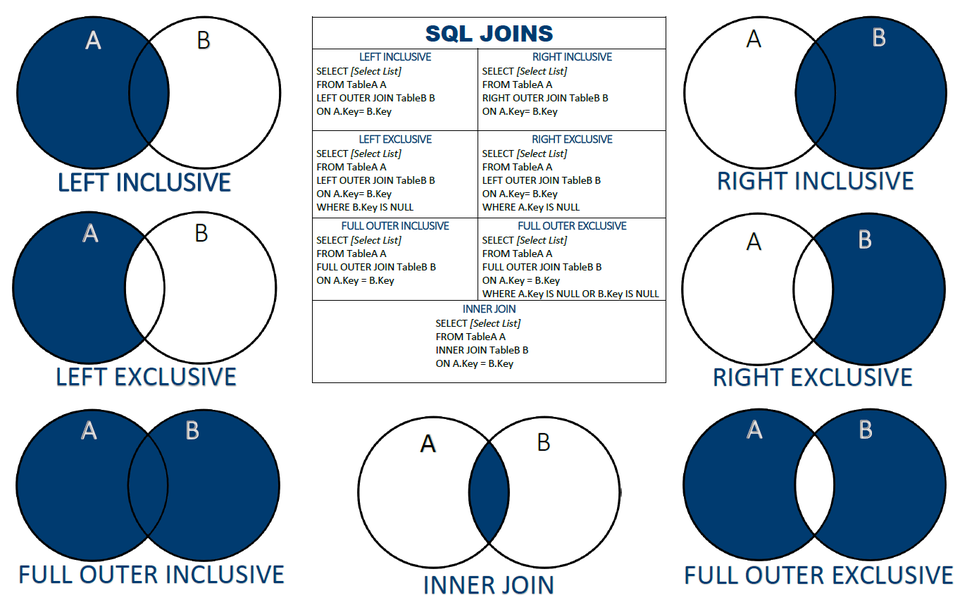

In [60]:
%%sql
SELECT *
    FROM Students s
NATURAL JOIN Faculties f;

 * sqlite://
Done.


id,name,gpa,faculty_id


In [ ]:
%%sql
SELECT *
    FROM Students s
INNER JOIN Faculties f
    ON s.faculty_id = f.id;

 * sqlite://
Done.


id,name,gpa,faculty_id,id_1,name_1
1,Sidorov,3,1,1,IT
2,Petrov,3.5,2,2,KIB
3,Verikov,4,1,1,IT
4,Smith,4.2,2,2,KIB
5,Lee,4.5,1,1,IT


In [39]:
%%sql
SELECT *
    FROM Students s
LEFT JOIN Faculties f
    ON s.faculty_id = f.id;

 * sqlite://
Done.


id,name,gpa,faculty_id,id_1,name_1
1,Sidorov,3,1,1,IT
2,Petrov,3.5,2,2,KIB
3,Verikov,4,1,1,IT
4,Smith,4.2,2,2,KIB
5,Lee,4.5,1,1,IT
6,Vorontsov,3.2,None,None,None


In [41]:
%%sql
SELECT *
    FROM Students s
RIGHT OUTER JOIN Faculties F
    ON s.faculty_id = f.id;

 * sqlite://
(sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported
[SQL: SELECT *
    FROM Students s
RIGHT OUTER JOIN Faculties F
    ON s.faculty_id = f.id;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [48]:
%%sql

SELECT * FROM Students s
LEFT OUTER JOIN Faculties f
ON s.faculty_id = f.id

UNION

SELECT * FROM Faculties f
LEFT OUTER JOIN Students s
ON s.faculty_id = f.id; -- = FULL OUTER

 * sqlite://
Done.


id,name,gpa,faculty_id,id_1,name_1
1,IT,1,Sidorov,3,1
1,IT,3,Verikov,4,1
1,IT,5,Lee,4.5,1
1,Sidorov,3,1,1,IT
2,KIB,2,Petrov,3.5,2
2,KIB,4,Smith,4.2,2
2,Petrov,3.5,2,2,KIB
3,Verikov,4,1,1,IT
4,Smith,4.2,2,2,KIB
5,Lee,4.5,1,1,IT


In [42]:
%%sql
SELECT *
    FROM Students s
CROSS JOIN Faculties F;

 * sqlite://
Done.


id,name,gpa,faculty_id,id_1,name_1
1,Sidorov,3,1,1,IT
1,Sidorov,3,1,2,KIB
2,Petrov,3.5,2,1,IT
2,Petrov,3.5,2,2,KIB
3,Verikov,4,1,1,IT
3,Verikov,4,1,2,KIB
4,Smith,4.2,2,1,IT
4,Smith,4.2,2,2,KIB
5,Lee,4.5,1,1,IT
5,Lee,4.5,1,2,KIB


In [55]:
%%sql
SELECT *
    FROM Students s
JOIN Faculties F
USING (id);

 * sqlite://
Done.


id,name,gpa,faculty_id,name_1
1,Sidorov,3,1,IT
2,Petrov,3.5,2,KIB


In [54]:
%%sql
SELECT *
    FROM Students s JOIN Faculties f
    ON s.id = f.id;

 * sqlite://
Done.


id,name,gpa,faculty_id,id_1,name_1
1,Sidorov,3,1,1,IT
2,Petrov,3.5,2,2,KIB
